<center><h1>Virial coefficient analysis</h1></center>

We import the usual modules

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline

Now we read in the data. We will make a dictionary containing the data frames

In [5]:
order = 5 #maximum order to read in to
B = {}
for i in range (2,order+1):
    filename = 'B'+str(i)+'_L5d0_D1d0-norm-csv.dat'
    B['B'+str(i)] = pd.read_csv(filename, index_col=0)
    
print(B.keys())
print('')
print(B['B2'].head())
print('')
print(B['B3'].head())

dict_keys(['B2', 'B4', 'B5', 'B3'])

     S2     alpha         B2     error
0  0.00  0.000000  37.433502  0.008797
1  0.01  0.390093  37.458305  0.008754
2  0.02  0.555707  37.437891  0.008764
3  0.03  0.685640  37.430029  0.008824
4  0.04  0.797652  37.408796  0.008834

     S2     alpha          B3     error       B3*    error*
0  0.00  0.000000  587.776607  0.174439  0.419461  0.000124
1  0.01  0.390093  588.413150  0.175374  0.419359  0.000125
2  0.02  0.555707  588.013645  0.172924  0.419532  0.000123
3  0.03  0.685640  587.770726  0.175934  0.419534  0.000126
4  0.04  0.797652  587.427093  0.173932  0.419765  0.000124


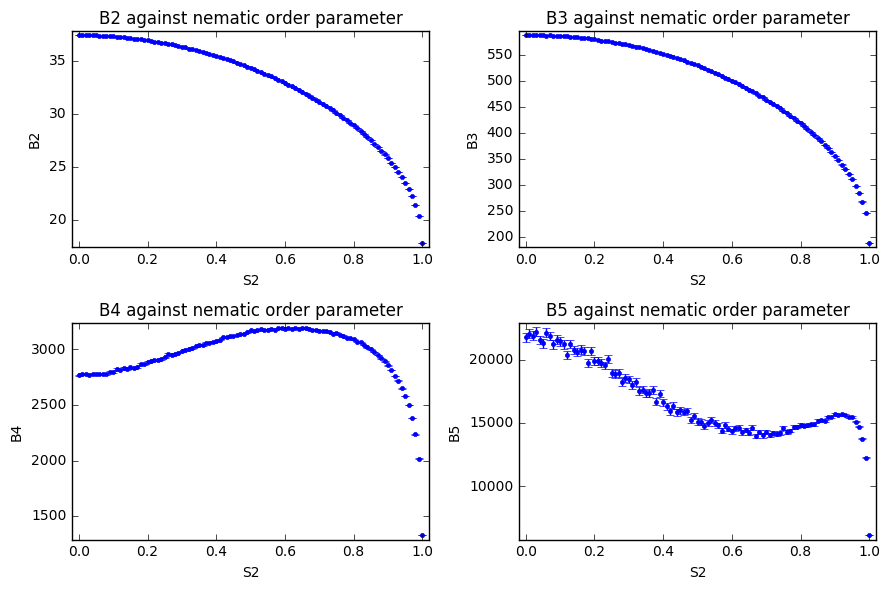

In [16]:
fig = plt.figure(figsize=(9, 6)) 
for i in range(2,order+1):
    Bi = 'B'+str(i)
    plt.subplot(order/2,2,i-1)
    plt.errorbar(B[Bi]['S2'], B[Bi][Bi], B[Bi]['error'], marker='.', linestyle='None')
    plt.margins(0.02)
    plt.xlabel('S2')
    plt.ylabel(Bi)
    plt.title(Bi+' against nematic order parameter')
    plt.tight_layout()
    
plt.show()

Now we fit polynomials to the data

In [108]:
poly_order = np.empty(9)
poly_order[2] = 9
poly_order[3] = 9
poly_order[4] = 9
poly_order[5] = 9
poly_order[6] = 9
poly_order[7] = 9
poly_order[8] = 9
poly = {}
for i in range(2,order+1):
    Bi = 'B'+str(i)
    selection = (B[Bi]['S2'] < 1.0)               #ignore the last point (S=1.0), since we get a bad fit for low S
    S_section = B[Bi][selection]['S2']
    B_section = B[Bi][selection][Bi]
    error_section = B[Bi][selection]['error']
    B_max = B_section.max()
    poly[Bi] = np.polyfit(S_section, B_section/B_max, poly_order[i], w=error_section)
    poly[Bi] *= B_max
    print(i, Bi, poly[Bi])

2 B2 [ -3.69775786e+03   1.50756784e+04  -2.56645772e+04   2.36047771e+04
  -1.26892150e+04   4.02503014e+03  -7.23798340e+02   5.43930594e+01
  -2.54587211e+00   3.74608407e+01]
3 B3 [ -6.15402131e+04   2.49017606e+05  -4.21526312e+05   3.86243238e+05
  -2.07302407e+05   6.59235034e+04  -1.20725018e+04   9.43065252e+02
  -4.41474353e+01   5.88332196e+02]
4 B4 [ -4.25891082e+05   1.63141987e+06  -2.61623004e+06   2.27347836e+06
  -1.15748759e+06   3.49853658e+05  -6.50302551e+04   9.26035674e+03
  -2.42620288e+02   2.77337587e+03]
5 B5 [  2.15365571e+06  -1.26935697e+07   2.86856427e+07  -3.32929264e+07
   2.18140186e+07  -8.24358924e+06   1.80004336e+06  -2.39526326e+05
   6.64069054e+03   2.18755259e+04]


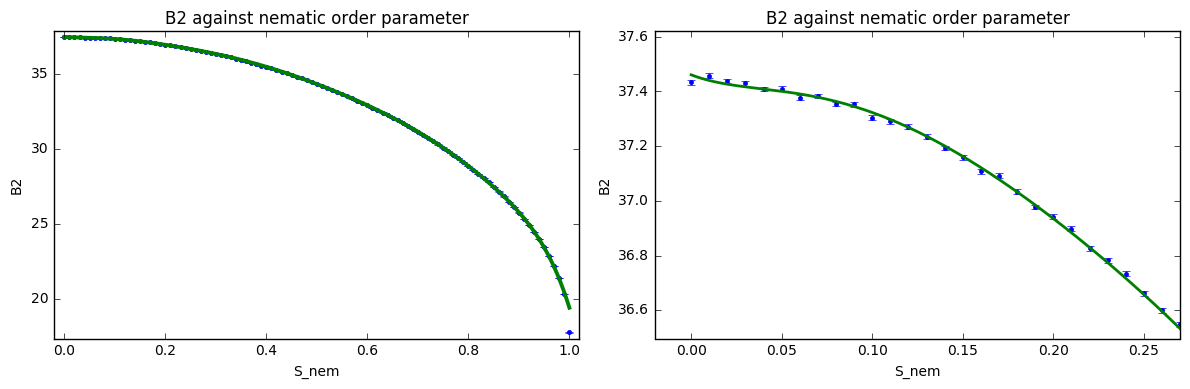

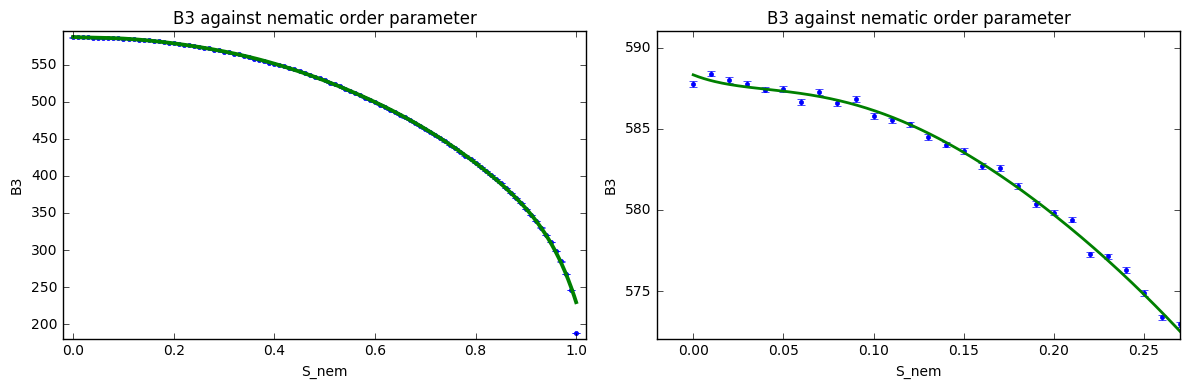

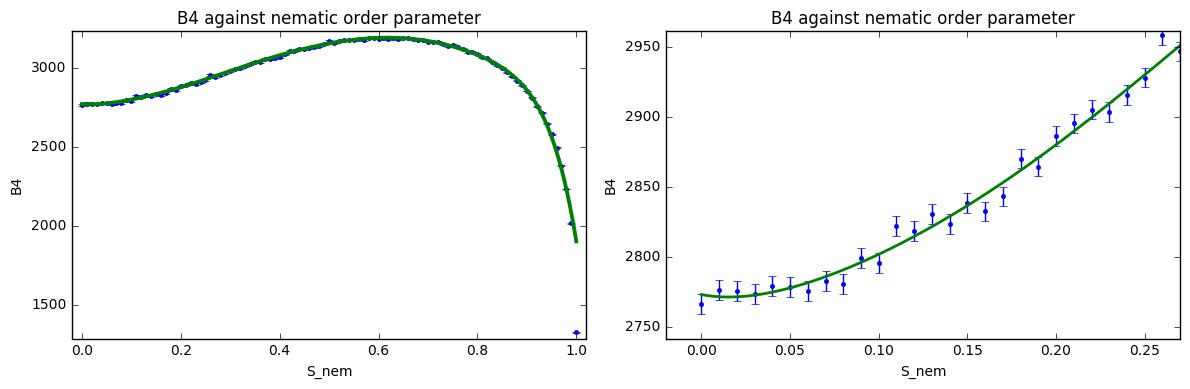

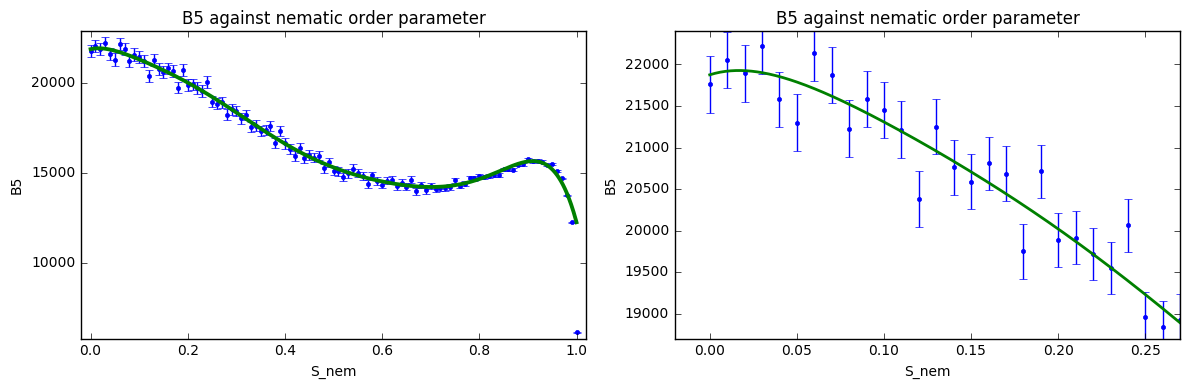

In [109]:
for j in range(2,order+1):
    Bi = 'B'+str(j)
    x = np.linspace(0.0,1.0,1000)
    y = np.zeros(len(x))
    n = len(poly[Bi])
    for i in range(n):
        y += poly[Bi][i]*x**(n-i-1)
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].errorbar(B[Bi].S2, B[Bi][Bi], B[Bi].error, marker='.', linestyle='None')
    axes[0].plot(x,y, marker='None', linewidth=2.75)
    axes[0].margins(0.02)
    axes[0].set_xlabel('S_nem')
    axes[0].set_ylabel(Bi)
    axes[0].set_title(Bi +' against nematic order parameter')
    
    x_min = 0.0
    x_max = 0.25 
    y_min = 0.0
    y_max = 0.0
    for i in range(n):
        y_min += poly[Bi][i]*x_min**(n-i-1)
        y_max += poly[Bi][i]*x_max**(n-i-1)
    y_min1 = min(y_min,y_max)
    y_max1 = max(y_min,y_max)    
    dy = y_max1-y_min1
    y_max1 += dy*0.2
    y_min1 -= dy*0.2
    
    axes[1].errorbar(B[Bi].S2, B[Bi][Bi], B[Bi].error, marker='.', linestyle='None')
    axes[1].plot(x,y, marker='None', linewidth=2.0)
    axes[1].margins(0.02)
    axes[1].set_xlabel('S_nem')
    axes[1].set_ylabel(Bi)
    axes[1].set_title(Bi +' against nematic order parameter')
    axes[1].set_xlim([x_min-0.02, x_max+0.02])
    axes[1].set_ylim([y_min1, y_max1])
    plt.tight_layout()
    
    plt.show()

And we also take splines

In [47]:
cs = {}
for i in range (2,order+1):
    Bi = 'B'+str(i)
    cs[Bi] = UnivariateSpline(B[Bi]['S2'], B[Bi][Bi], B[Bi]['error'], k=5)

//anaconda/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


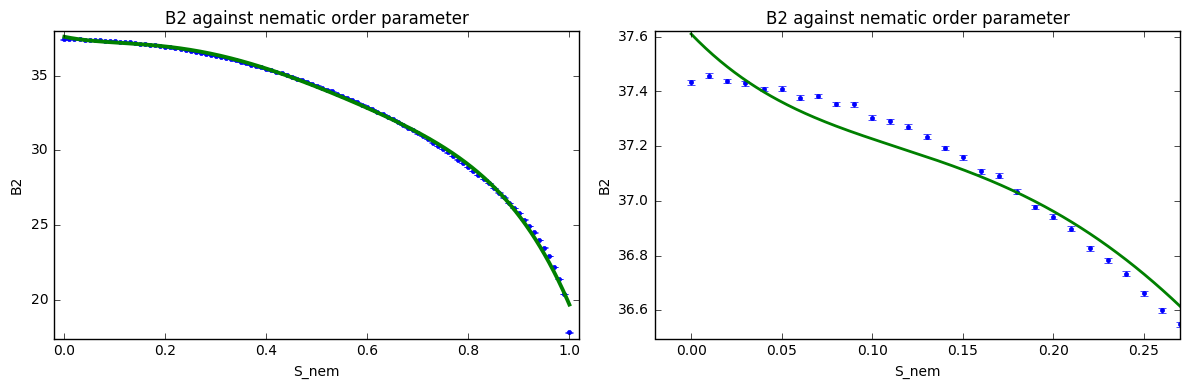

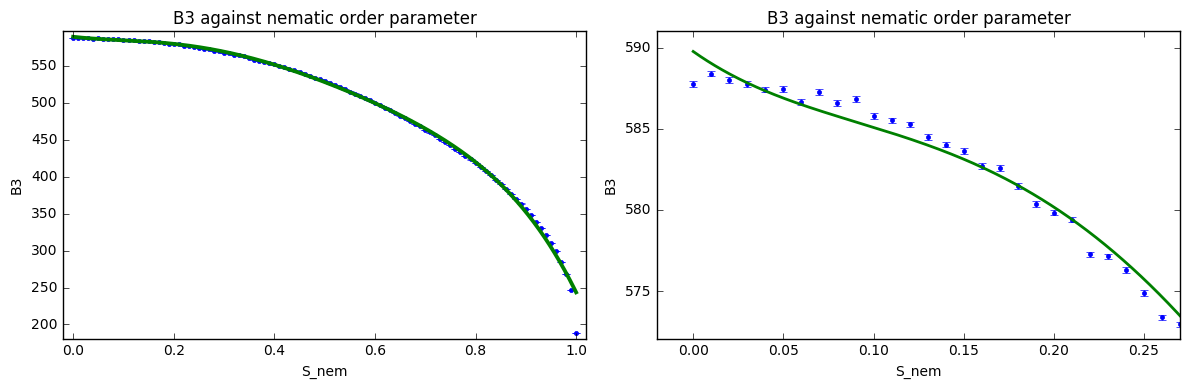

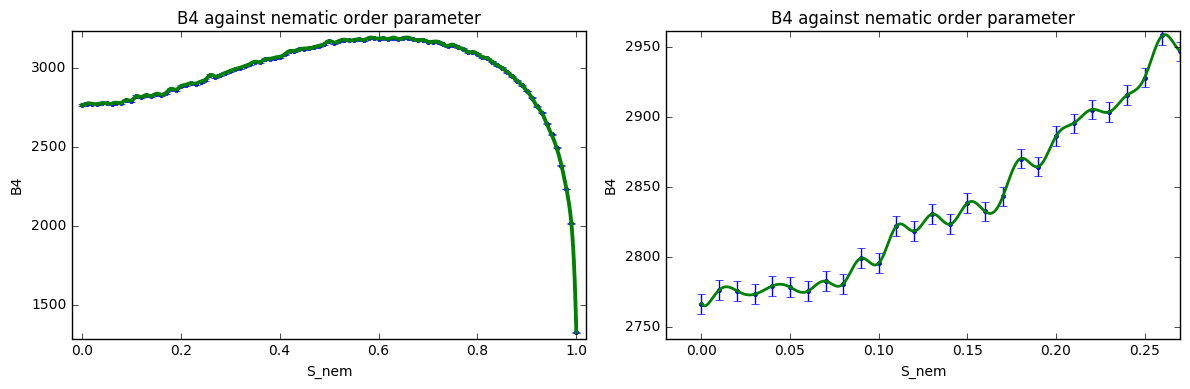

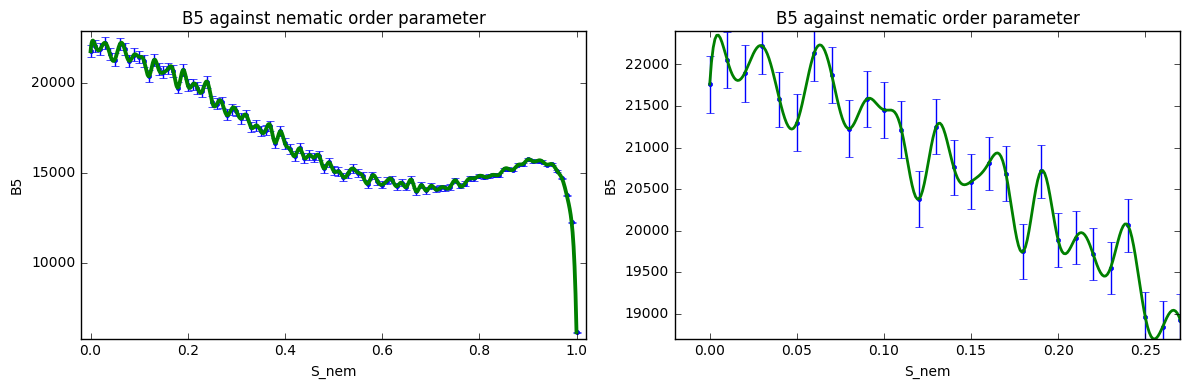

In [48]:
for j in range(2,order+1):
    Bi = 'B'+str(j)
    x = np.linspace(0.0,1.0,1000)
    y = cs[Bi](x)
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].errorbar(B[Bi].S2, B[Bi][Bi], B[Bi].error, marker='.', linestyle='None')
    axes[0].plot(x,y, marker='None', linewidth=2.75)
    axes[0].margins(0.02)
    axes[0].set_xlabel('S_nem')
    axes[0].set_ylabel(Bi)
    axes[0].set_title(Bi +' against nematic order parameter')
    
    x_min = 0.0
    x_max = 0.25 
    y_min = 0.0
    y_max = 0.0
    for i in range(n):
        y_min += poly[Bi][i]*x_min**(n-i-1)
        y_max += poly[Bi][i]*x_max**(n-i-1)
    y_min1 = min(y_min,y_max)
    y_max1 = max(y_min,y_max)    
    dy = y_max1-y_min1
    y_max1 += dy*0.2
    y_min1 -= dy*0.2
    
    axes[1].errorbar(B[Bi].S2, B[Bi][Bi], B[Bi].error, marker='.', linestyle='None')
    axes[1].plot(x,y, marker='None', linewidth=2.0)
    axes[1].margins(0.02)
    axes[1].set_xlabel('S_nem')
    axes[1].set_ylabel(Bi)
    axes[1].set_title(Bi +' against nematic order parameter')
    axes[1].set_xlim([x_min-0.02, x_max+0.02])
    axes[1].set_ylim([y_min1, y_max1])
    plt.tight_layout()
    
    plt.show()


Spline interpolation just tracks the errors, so we won't use it

Now we want to minimize the free energy for a given density, take that S2/alpha value, and use it to calculate S2/alpha, pressure, free energy and chemical potential against density

In [49]:
def free_energy(alpha, rho, poly, order=2):
    if alpha >150:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / alpha)
        sig = np.log(alpha) - 1.0
    elif alpha < 1e-10:
        x = 0.0
        sig = 0.0
    else:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / (alpha*np.tanh(alpha)))
        sig = np.log(alpha/np.tanh(alpha)) + np.arctan(np.sinh(alpha))/np.sinh(alpha) - 1.0
    fe = sig + np.log(rho) - 1.0
    for i in range (2,order+1):
        Bi = 'B'+str(i)
        n = len(poly[Bi])
        B = 0.0
        for j in range(n):
            B += poly[Bi][j]*x**(n-j-1)
        fe += B*rho**(i-1)/(i-1)
    return fe


In [50]:
def chemical_potential(alpha, rho, poly, order=2):
    if alpha >150:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / alpha)
        sig = np.log(alpha) - 1.0
    elif alpha < 1e-10:
        x = 0.0
        sig = 0.0
    else:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / (alpha*np.tanh(alpha)))
        sig = np.log(alpha/np.tanh(alpha)) + np.arctan(np.sinh(alpha))/np.sinh(alpha) - 1.0
    mu = sig + np.log(rho)
    for i in range (2,order+1):
        Bi = 'B'+str(i)
        n = len(poly[Bi])
        B = 0.0
        for j in range(n):
            B += poly[Bi][j]*x**(n-j-1)
        mu += B*i*rho**(i-1)/(i-1)
    return mu


In [51]:
def pressure(alpha, rho, poly, order=2):
    P = rho
    if alpha >150:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / alpha)
    elif alpha < 1e-10:
        x = 0.0
    else:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / (alpha*np.tanh(alpha)))
    for i in range (2,order+1):
        Bi = 'B'+str(i)
        n = len(poly[Bi])
        B = 0.0
        for j in range(n):
            B += poly[Bi][j]*x**(n-j-1)
        P += B*rho**i
    return P


In [52]:
def nematic_order(alpha):
    if alpha > 150:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / alpha)
    elif alpha < 1e-4:
        x = 0.0
    else:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / (alpha*np.tanh(alpha)))
    if x < 0.0:
        x = -x
    return x

Now we plot the free energy against alpha. We also find the minimum value, both my minimizing the free energy function (a_min2 corresponds to this value) and by simply taking the index of the minimum value for the free energy that we calculate for the plot (a_min1 gives this value of alpha)

alpha for minimum free energy (methods 1 and 2):  0.638814845193 0.638849645832


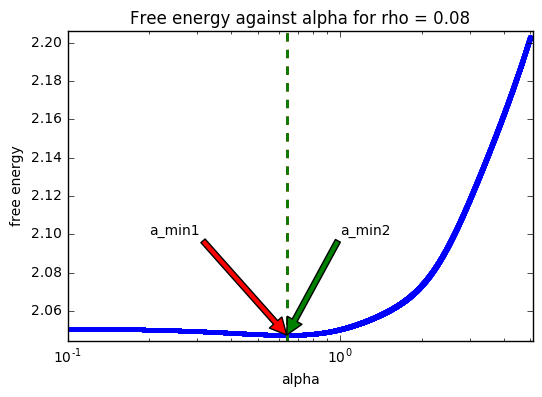

In [98]:
a_min = -1
a_max = 0.7
alpha = 10**np.arange(a_min,a_max,(a_max-a_min)/20000.0)
alpha = np.insert(alpha, 0, 0)
fe = np.empty(len(alpha))
rho = 0.08
for i in range(len(alpha)):
    fe[i] = free_energy(alpha[i], rho, poly, order)
    
a_min1 = alpha[np.argmin(fe)]
a_min2 = minimize_scalar(free_energy, args = (rho, poly, order), bounds = (-1e-10,2e3), method='bounded').x
print('alpha for minimum free energy (methods 1 and 2): ', a_min1, a_min2)
                               
plt.plot(alpha, fe, marker=".")

plt.annotate('a_min1', xy=(a_min1, free_energy(a_min1, rho, poly, order)), xytext=(2e-1, 2.1),
            arrowprops=dict(facecolor='red'),
            )
plt.annotate('a_min2', xy=(a_min2, free_energy(a_min2, rho, poly, order)), xytext=(1.0, 2.1),
            arrowprops=dict(facecolor='green'),
            )
plt.axvline(a_min1, color='r', linestyle='dashed', linewidth=2)
plt.axvline(a_min2, color='g', linestyle='dashed', linewidth=2)
plt.xlabel("alpha")
plt.ylabel("free energy")
plt.xscale('log')
plt.margins(0.02)
plt.title('Free energy against alpha for rho = '+str(rho))
plt.show()

Both methods give roughly the same minumum.

Now we try the same for a range of tho values

In [72]:
r_min = 0.001
r_max = 0.25
n_r = 500
rho = np.arange(r_min, r_max, (r_max-r_min)/n_r)
a_min1 = np.empty(len(rho))
a_min2 = np.empty(len(rho))

a_min = -1
a_max = 4
alpha = 10**np.arange(a_min,a_max,(a_max-a_min)/20000.0)
alpha = np.insert(alpha, 0, 0)


for j in range(len(rho)):
    
    fe = np.empty(len(alpha))
    for i in range(len(alpha)):
        fe[i] = free_energy(alpha[i], rho[j], poly, order)
    if alpha[np.argmin(fe)] > 1e-1:
        a_min1[j] = alpha[np.argmin(fe)]
    else:
        a_min1[j] = 0.0
    a_min2[j] = (minimize_scalar(free_energy, args = (rho[j], poly, order), bounds = (-1e-10,2e3), method='bounded')).x
        

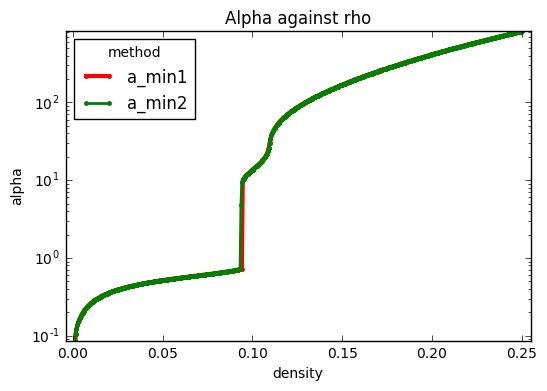

In [74]:
plt.plot(rho, a_min1, marker=".", color='r', linewidth=3, label='a_min1')
plt.plot(rho, a_min2, marker=".", color='g', linewidth=2, label='a_min2')
plt.xlabel("density")
plt.ylabel("alpha")
plt.yscale('log')
plt.title('Alpha against rho')
plt.legend(loc='upper left', title="method")
plt.margins(0.02)
plt.show()

Now we calculate the pressures, chemical potentials etc., in both isotropic and nematic phases

In [75]:
S2 = np.empty(a_min1.shape[0])
Pn = np.empty(a_min1.shape[0])
Pi = np.empty(a_min1.shape[0])
fen = np.empty(a_min1.shape[0])
fei = np.empty(a_min1.shape[0])
mun = np.empty(a_min1.shape[0])
mui = np.empty(a_min1.shape[0])
i = 0
for alpha in a_min1:
    S2[i] = nematic_order(alpha)
    Pn[i] = pressure(alpha, rho[i], poly, order)
    Pi[i] = pressure(0.0, rho[i], poly, order)
    fen[i] = free_energy(alpha, rho[i], poly, order)
    fei[i] = free_energy(0.0, rho[i], poly, order)
    mun[i] = chemical_potential(alpha, rho[i], poly, order)
    mui[i] = chemical_potential(0.0, rho[i], poly, order)
    i +=1

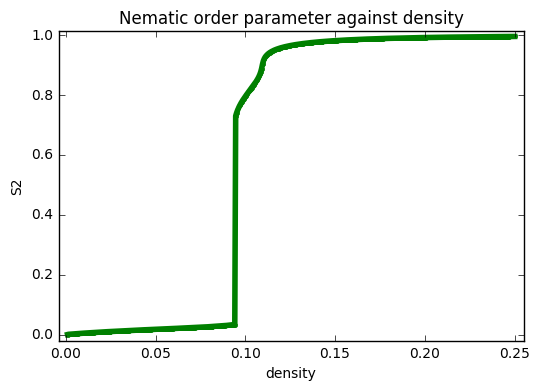

In [76]:
plt.plot(rho, S2, marker=".", color='g', linewidth=4)
plt.xlabel("density")
plt.ylabel("S2")
plt.title('Nematic order parameter against density')
plt.margins(0.02)
plt.show()

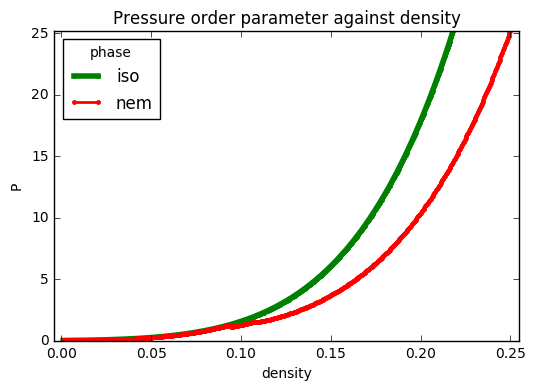

In [77]:
plt.plot(rho, Pi, marker=".", color='g', linewidth=4, label='iso')
plt.plot(rho, Pn, marker=".", color='r', linewidth=2, label='nem')
plt.xlabel("density")
plt.ylabel("P")
plt.title('Pressure order parameter against density')
plt.legend(loc='upper left', title="phase")
plt.ylim(0,Pn.max())
plt.margins(0.02)
plt.show()

And now we output the file, in a nice to read manner

In [78]:
data = {}
data['density'] = rho
data['alpha'] = a_min1
data['S_nem'] = S2
data['F(iso)'] = fei
data['F(nem)'] = fen
data['P(iso)'] = Pi
data['P(nem)'] = Pn
data['mu(iso)'] = mui
data['mu(nem)'] = mun
col_order = ['density', 'alpha', 'S_nem', 'F(iso)', 'F(nem)', 'P(iso)', 'P(nem)', 'mu(iso)', 'mu(nem)']
df = pd.DataFrame(data=data)[col_order]
with open('data_B'+str(order)+'.dat', 'w') as fo:
    fo.write(df.to_string())
print(df.head())

    density     alpha     S_nem    F(iso)    F(nem)    P(iso)    P(nem)  \
0  0.001000  0.000000  0.000000 -7.869999 -7.869999  0.001038  0.001038   
1  0.001498  0.106047  0.000749 -7.446845 -7.446846  0.001584  0.001584   
2  0.001996  0.122039  0.000992 -7.140659 -7.140661  0.002150  0.002150   
3  0.002494  0.136066  0.001232 -6.898596 -6.898600  0.002736  0.002736   
4  0.002992  0.148594  0.001469 -6.697072 -6.697078  0.003343  0.003343   

    mu(iso)   mu(nem)  
0 -6.831947 -6.831947  
1 -6.389399 -6.389403  
2 -6.063521 -6.063528  
3 -5.801465 -5.801477  
4 -5.579646 -5.579663  


Now we define the free energy of the nematic coupled to a field, with F/N = F_old/N - C*S_nem, where C is the strength of the field.

Note that this term favours alingment, as when S_nem is large, the free energy is reduced, and for larger C the effect is stronger

In [79]:
def free_energy_coupled(alpha, rho, poly, C, order=2):
    if alpha >150:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / alpha)
        sig = np.log(alpha) - 1.0
    elif alpha < 1e-10:
        x = 0.0
        sig = 0.0
    else:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / (alpha*np.tanh(alpha)))
        sig = np.log(alpha/np.tanh(alpha)) + np.arctan(np.sinh(alpha))/np.sinh(alpha) - 1.0
    fe = sig + np.log(rho) - 1.0 - C*x
    for i in range (2,order+1):
        Bi = 'B'+str(i)
        n = len(poly[Bi])
        B = 0.0
        for j in range(n):
            B += poly[Bi][j]*x**(n-j-1)
        fe += B*rho**(i-1)/(i-1)
    return fe

The chemical potential will also have this term, while the pressue is not affected

In [80]:
def chemical_potential_coupled(alpha, rho, poly, C, order=2):
    if alpha >150:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / alpha)
        sig = np.log(alpha) - 1.0
    elif alpha < 1e-10:
        x = 0.0
        sig = 0.0
    else:
        x = 1.0 + (3.0 / (alpha**2)) - (3.0 / (alpha*np.tanh(alpha)))
        sig = np.log(alpha/np.tanh(alpha)) + np.arctan(np.sinh(alpha))/np.sinh(alpha) - 1.0
    mu = sig + np.log(rho) - C*x
    for i in range (2,order+1):
        Bi = 'B'+str(i)
        n = len(poly[Bi])
        B = 0.0
        for j in range(n):
            B += poly[Bi][j]*x**(n-j-1)
        mu += B*i*rho**(i-1)/(i-1)
    return mu

Now we plot the free energy against S_nem for different C 

C = 0.0:  0.617305291884 0.616977684818
C = 0.0:  0.0245162438365 0.0244911358886

C = 0.2:  1.48081225526 1.48033711533
C = 0.2:  0.121138593177 0.121074052628

C = 0.4:  2.36864513176 2.36881574871
C = 0.4:  0.245774712735 0.245798232701

C = 0.6:  4.12097519094 4.12015997837
C = 0.6:  0.44828650917 0.448211680681

C = 0.8:  5.6428694134 5.64432510563
C = 0.8:  0.562557502149 0.562646066771

C = 1.0:  7.9341425677 7.93020372194
C = 1.0:  0.669543614004 0.669403161323

C = 1.2:  9.81747943011 9.81220297882
C = 1.2:  0.725548434241 0.72541759633

C = 1.4:  11.1557815134 11.157836874
C = 1.4:  0.755186927769 0.755227584592

C = 1.6:  12.302687708 12.3044762748
C = 1.6:  0.775971648579 0.776001332411

C = 1.8:  13.3659551653 13.3608672806
C = 1.8:  0.792341877889 0.792269197832

C = 2.0:  14.3714305334 14.3735282873
C = 2.0:  0.805777684616 0.805803910941



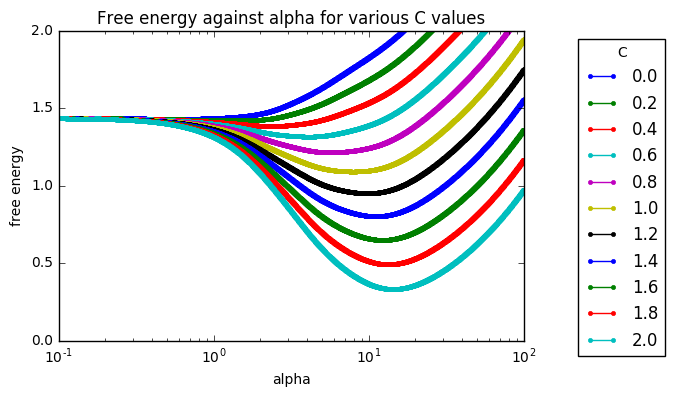

In [99]:
a_min = -6
a_max = 4
alpha = 10**np.arange(a_min,a_max,(a_max-a_min)/20000.0)
alpha = np.insert(alpha, 0, 0)
rho = 0.075

C = np.arange(0.0, 2.2, 0.2)
fe = np.empty([len(C),len(alpha)])
a_min1 = np.empty(len(C))
a_min2 = np.empty(len(C))

for j in range(len(C)):
    for i in range(len(alpha)):
        fe[j, i] = free_energy_coupled(alpha[i], rho, poly, C[j], order)
    a_min1[j] = alpha[np.argmin(fe[j,:])]
    a_min2[j] = (minimize_scalar(free_energy_coupled, args = (rho, poly, C[j], order), bounds = (-1e-10,2e3), method='bounded')).x
    print('C = '+str(C[j])+': ', a_min1[j], a_min2[j])
    print('C = '+str(C[j])+': ', nematic_order(a_min1[j]), nematic_order(a_min2[j]))
    print('')
    plt.plot(alpha, fe[j,:], marker=".", label=C[j])

plt.xlabel("alpha")
plt.ylabel("free energy")
plt.xscale('log')
plt.xlim(0.1,100)
plt.ylim(0,2)
plt.legend(loc='upper left', title="C", bbox_to_anchor=(1.1, 1.0))
plt.title('Free energy against alpha for various C values')
plt.margins(0.02)
plt.show()

As we increase C, for a fixed density the mimimum in the free energy moves rightwards, and gets deeper, so nematic ordering is increasingly favoured.

Now we calculate everything as a function of pressure for a range of C values. We just use the inbuilt function to minimize the free energies

In [102]:
r_min = 0.001
r_max = 0.25
n_r = 500
rho = np.arange(r_min, r_max+(r_max-r_min)/n_r, (r_max-r_min)/n_r)

C = np.arange(0.0, 3.2, 0.2)
a_min1 = np.empty([len(C), len(rho)])

S2 = np.empty([len(C), len(rho)])
Pn = np.empty([len(C), len(rho)])
Pi = np.empty([len(C), len(rho)])
fen = np.empty([len(C), len(rho)])
fei = np.empty([len(C), len(rho)])
mun = np.empty([len(C), len(rho)])
mui = np.empty([len(C), len(rho)])

for k in range(len(C)):
    for j in range(len(rho)):
        a_min1[k,j] = (minimize_scalar(free_energy_coupled, args = (rho[j], poly, C[k], order), bounds = (-1e-10,2e3), method='bounded')).x
        S2[k,j] = nematic_order(a_min1[k,j])
        Pn[k,j] = pressure(a_min1[k,j], rho[j], poly, order)
        Pi[k,j] = pressure(0.0, rho[j], poly, order)
        fen[k,j] = free_energy_coupled(a_min1[k,j], rho[j], poly, C[k], order)
        fei[k,j] = free_energy_coupled(0.0, rho[j], poly, C[k], order)
        mun[k,j] = chemical_potential_coupled(a_min1[k,j], rho[j], poly, C[k], order)
        mui[k,j] = chemical_potential_coupled(0.0, rho[j], poly, C[k], order)
    print(100.0*(k+1)/len(C),'%')

6.25 %
12.5 %
18.75 %
25.0 %
31.25 %
37.5 %
43.75 %
50.0 %
56.25 %
62.5 %
68.75 %
75.0 %
81.25 %
87.5 %
93.75 %
100.0 %


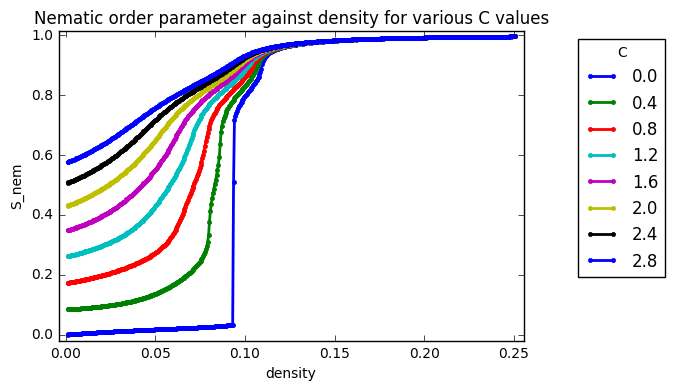

In [104]:
for k in range(0,len(C),2):
    plt.plot(rho, S2[k,:], marker=".", linewidth=2, label=C[k])
    
plt.xlabel("density")
plt.ylabel("S_nem")
plt.margins(0.02)
plt.legend(loc='upper left', title="C", bbox_to_anchor=(1.1, 1.0))
plt.title('Nematic order parameter against density for various C values')
#plt.yscale('log')
plt.show()

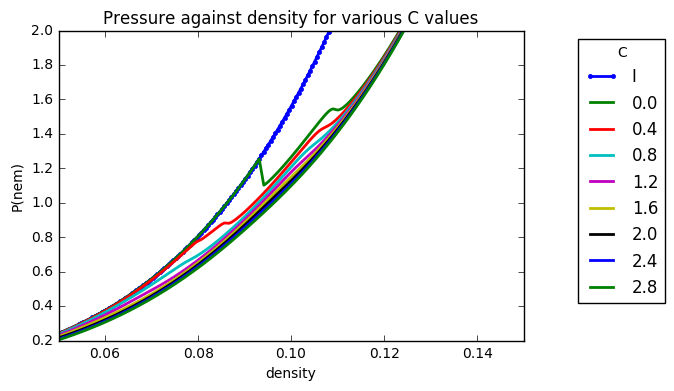

In [105]:
plt.plot(rho, Pi[0,:], marker=".", linewidth=2, label='I')
for k in range(0,len(C),2):
    plt.plot(rho, Pn[k,:], marker="None", linewidth=2, label=C[k])
    
plt.xlabel("density")
plt.ylabel("P(nem)")
plt.margins(0.02)
plt.legend(loc='upper left', title="C", bbox_to_anchor=(1.1, 1.0))
#plt.yscale('log')
plt.xlim(0.05,0.15)
plt.ylim(0.2,2.0)
plt.title('Pressure against density for various C values')
plt.show()

And now we output the data files, giving them names of the form "data_Bn_Cc.dat", 

In [95]:
col_order = ['density', 'alpha', 'S_nem', 'F(iso)', 'F(nem)', 'P(iso)', 'P(nem)', 'mu(iso)', 'mu(nem)']
for k in range(0,len(C)):
    data = {}
    data['density'] = rho
    data['alpha'] = a_min1[k,:]
    data['S_nem'] = S2[k,:]
    data['F(iso)'] = fei[k,:]
    data['F(nem)'] = fen[k,:]
    data['P(iso)'] = Pi[k,:]
    data['P(nem)'] = Pn[k,:]
    data['mu(iso)'] = mui[k,:]
    data['mu(nem)'] = mun[k,:]
    df = pd.DataFrame(data=data)[col_order]
    if C[k] >= 1.0:
        filename = 'data_B'+str(order)+'_C'+str(int(C[k]))+'d'+str(int(10*np.remainder(C[k],int(C[k]))))+'.dat'
    elif C[k] > 0.0:
        filename = 'data_B'+str(order)+'_C'+str(int(C[k]))+'d'+str(int(10.0*C[k]))+'.dat'
    else:
        filename = 'data_B'+str(order)+'_C'+str(int(C[k]))+'d0.dat'
    with open(filename, 'w') as fo:
        fo.write(df.to_string())